In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/Shareddrives/DATA 230 - Data Visualization Group Project/src/Group Project src - Original

/content/drive/Shareddrives/DATA 230 - Data Visualization Group Project/src/Group Project src - Original


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", context="talk")
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
file_path = './student_depression_dataset.csv'
df = pd.read_csv(file_path)
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [15]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [25]:
df = df[df['Financial Stress'] != '?']
# convert financial stress to float
df['Financial Stress'] = df['Financial Stress'].astype(float)


--- Distribution of Target Variable (Depression) ---
Counts:
Depression
1    16335
0    11563
Name: count, dtype: int64

Percentages:
Depression
1    58.552584
0    41.447416
Name: proportion, dtype: float64


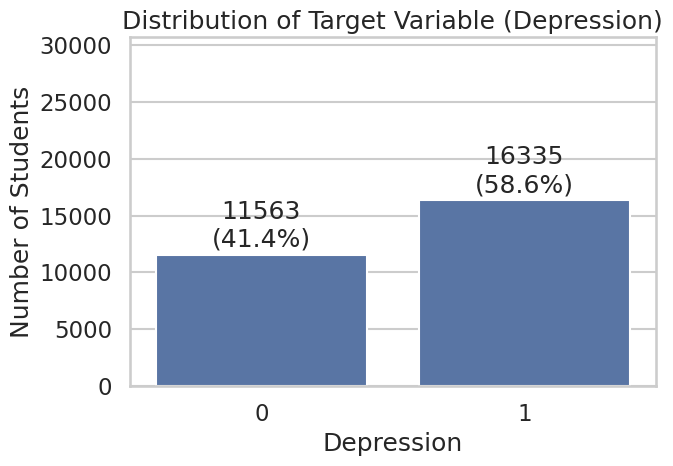

In [26]:
# --- Task 1: Univariate Analysis ---
target_col = 'Depression' # Confirmed target column name

if target_col not in df.columns:
    print(f"\nError: Target column '{target_col}' not found in the dataset.")
    # Attempt to find likely target columns if the provided one is wrong
    print("Available columns:", df.columns.tolist())
    # Exit or handle error appropriately
    exit()

# --- Target Variable Distribution ---
print(f"\n--- Distribution of Target Variable ({target_col}) ---")
target_counts = df[target_col].value_counts()
target_percentage = df[target_col].value_counts(normalize=True) * 100
print("Counts:")
print(target_counts)
print("\nPercentages:")
print(target_percentage)

# Plotting the target variable distribution
plt.figure(figsize=(7, 5))
# Use seaborn for better aesthetics, order bars by index (class name)
sns.countplot(x=target_col, data=df, order=sorted(df[target_col].unique()))
plt.title(f'Distribution of Target Variable ({target_col})')
plt.xlabel(target_col)
plt.ylabel('Number of Students')
# Add text labels for counts and percentages
for i, count in enumerate(target_counts[sorted(df[target_col].unique())]):
    percentage = target_percentage[sorted(df[target_col].unique())[i]]
    plt.text(i, count + 0.01 * df.shape[0], f'{count}\n({percentage:.1f}%)', ha='center', va='bottom') # Adjust label position
plt.ylim(0, df.shape[0] * 1.1) # Adjust ylim to make space for labels
plt.tight_layout()
plt.show()

In [27]:
print("\n--- Class Imbalance Report ---")
min_class_perc = target_percentage.min()
max_class_perc = target_percentage.max()
print(f"Minority Class Percentage: {min_class_perc:.2f}%")
print(f"Majority Class Percentage: {max_class_perc:.2f}%")
# Instruction: SMOTE if imbalance > 20 %. Assuming this means minority class is < 20%
if min_class_perc < 20:
     print("Note: Minority class is less than 20%. Consider using SMOTE or other resampling techniques.")
elif min_class_perc < 40: # Give a slightly less strong warning for moderate imbalance
     print("Note: Some class imbalance detected. Monitor model performance metrics closely (e.g., F1, PR-AUC).")
else:
    print("Classes are relatively balanced.")



--- Class Imbalance Report ---
Minority Class Percentage: 41.45%
Majority Class Percentage: 58.55%
Classes are relatively balanced.



--- Plotting Univariate Distributions for Numerical Features ---


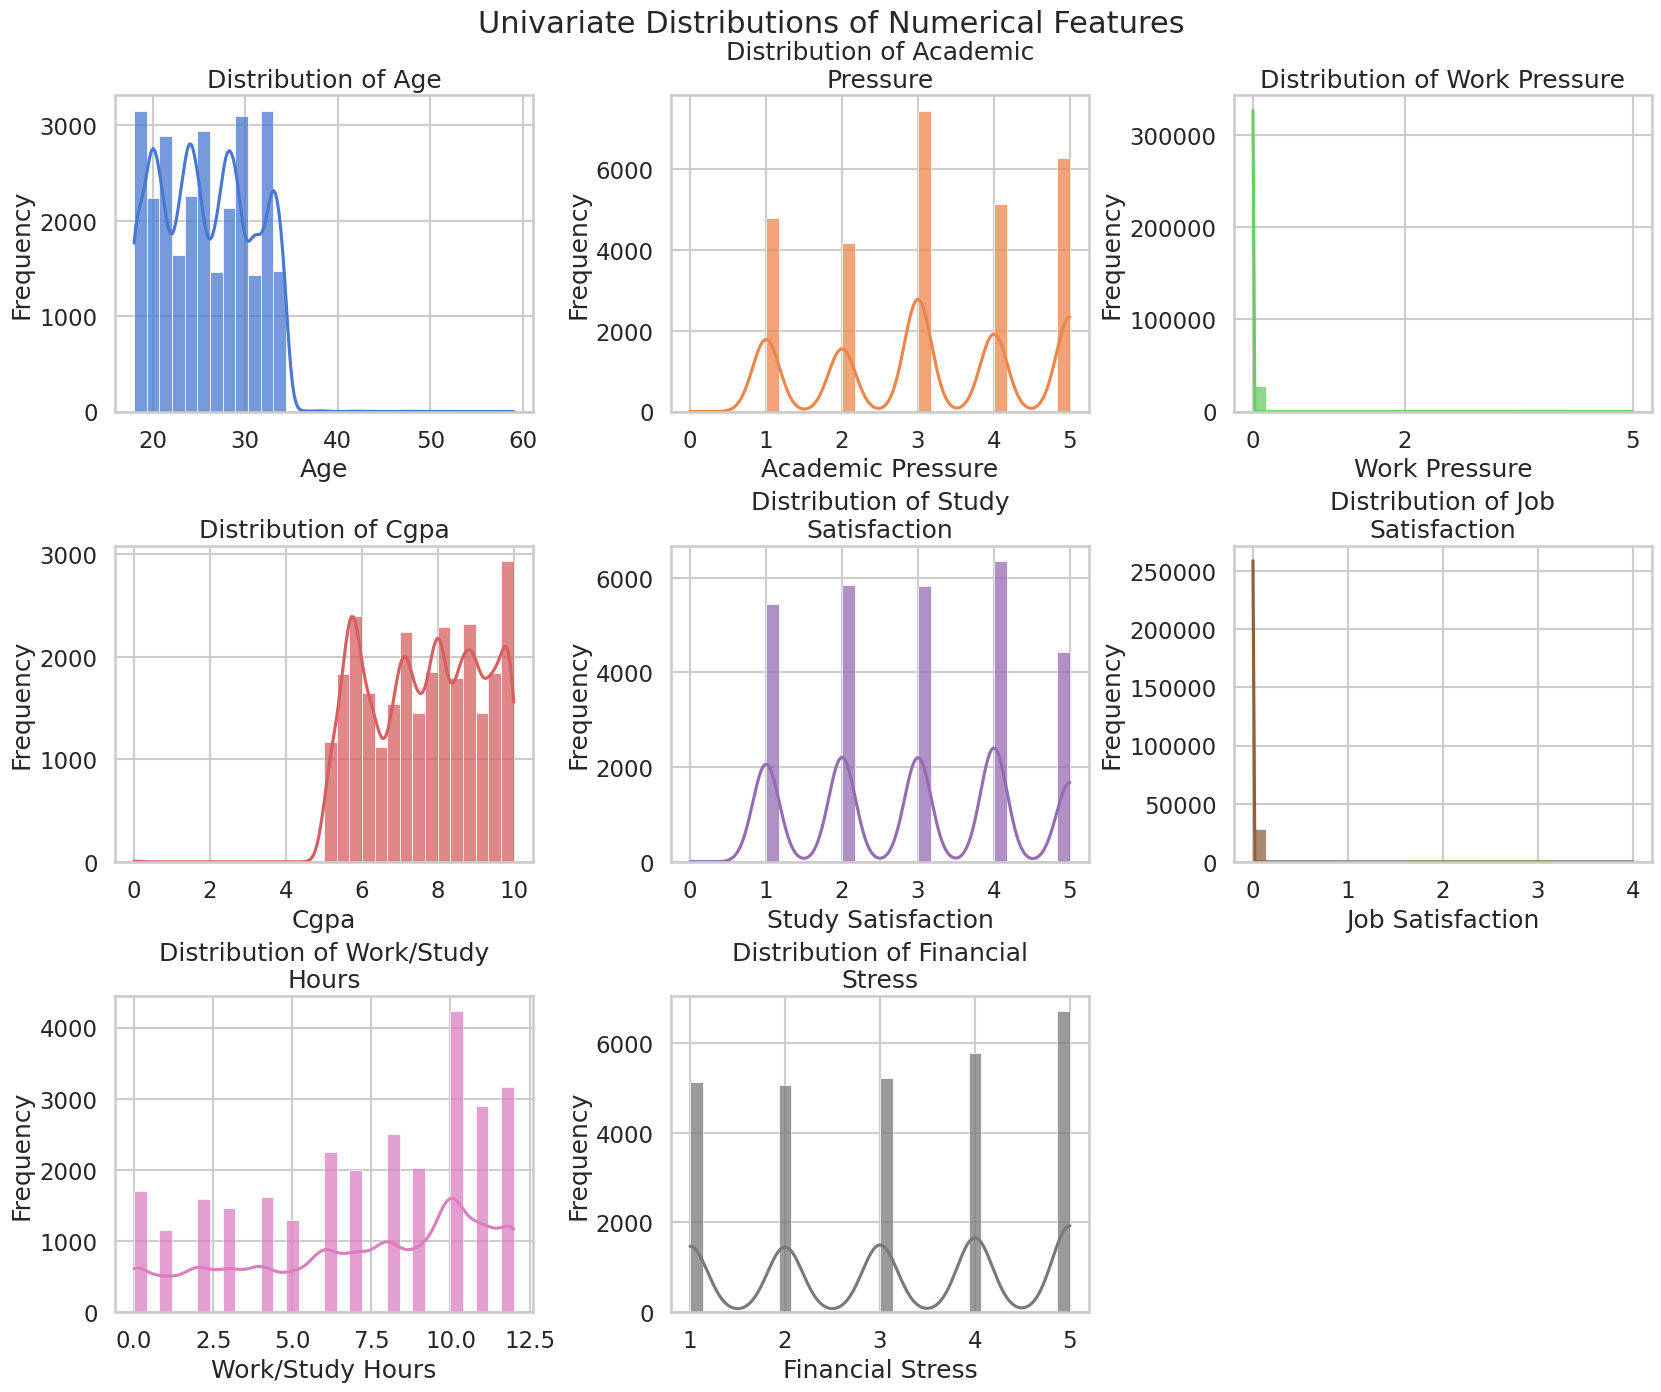

In [32]:
import textwrap
print("\n--- Plotting Univariate Distributions for Numerical Features ---")
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if target_col in numerical_features:
    numerical_features.remove(target_col)

numerical_features.remove('id')

if not numerical_features:
    print("No numerical features found (excluding target/IDs).")
else:
    # 3. Dynamic grid
    n_cols = 3
    n_rows = -(-len(numerical_features) // n_cols)  # ceiling division
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(n_cols * 5.5, n_rows * 4.5),
                             constrained_layout=True)
    axes = axes.flatten()
    palette = sns.color_palette("muted", n_colors=len(numerical_features))

    for i, col in enumerate(numerical_features):
        sns.histplot(
            df[col], kde=True, ax=axes[i],
            color=palette[i], alpha=0.75,
            edgecolor="white", linewidth=0.5, bins=30
        )

        # 4a.  Prettier axis/title names
        pretty_name = col.replace('_', ' ').title()
        axes[i].set_title("\n".join(textwrap.wrap(f"Distribution of {pretty_name}", 29)))
        axes[i].set_xlabel(pretty_name)
        axes[i].set_ylabel("Frequency")
        axes[i].ticklabel_format(style='plain', axis='y')

        # 4b. Snap ticks for small discrete ranges
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= 10 and df[col].dtype.kind in 'if':
            axes[i].set_xticks(sorted(unique_vals))

    # 3b.  Remove empty axes
    for j in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[j])

    # 3c.  Overall title
    fig.suptitle("Univariate Distributions of Numerical Features", fontsize=22, y=1.02)
    plt.show()


--- Plotting Univariate Distributions for Categorical Features ---
Found 6 categorical features: ['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Family History of Mental Illness']


<ipython-input-41-4289d7c7b385>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=order, palette=bar_palette, ax=axes[i])
<ipython-input-41-4289d7c7b385>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=order, palette=bar_palette, ax=axes[i])
<ipython-input-41-4289d7c7b385>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=order, palette=bar_palette, ax=axes[i])
<ipython-input-41-4289d7c7b385>:29: FutureWarning: 

Passing `palette` without assigning `hue` is depre

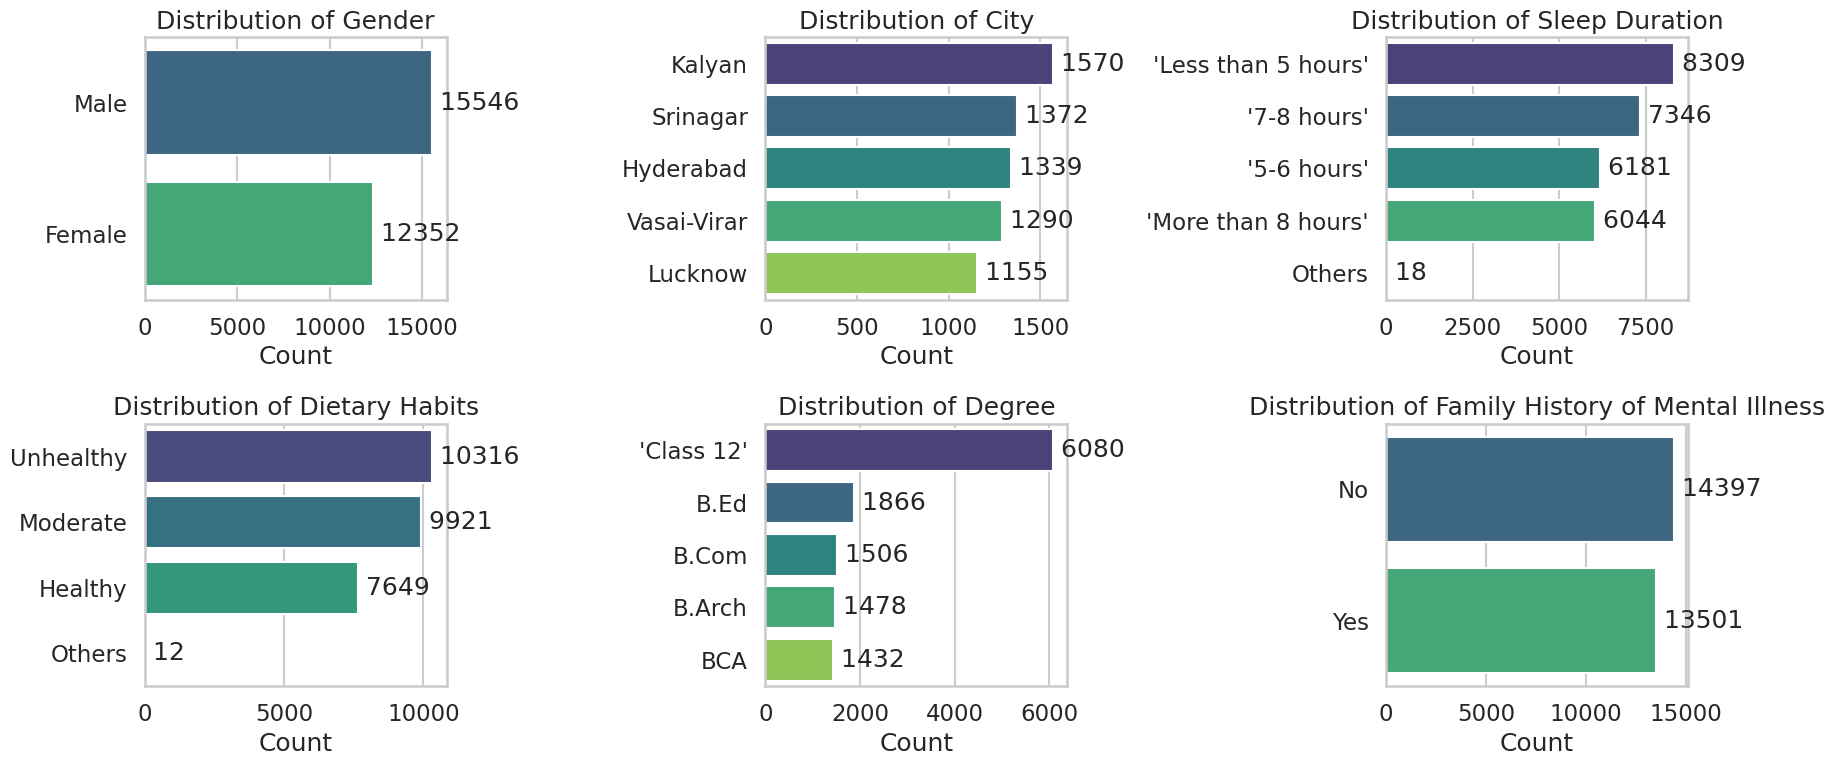

In [41]:
print("\n--- Plotting Univariate Distributions for Categorical Features ---")
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
if target_col in categorical_features:
    categorical_features.remove(target_col)
categorical_features = [c for c in categorical_features if c not in potential_id_cols]
categorical_features.remove('Profession')

top_cities  = df['City'].value_counts().head(5).index
top_degree  = df['Degree'].value_counts().head(5).index

if not categorical_features:
    print("No categorical features found (excluding target/IDs).")
else:
    print(f"Found {len(categorical_features)} categorical features: {categorical_features}")

    n_rows, n_cols = 2, 3                                      # fixed 2 × 3 grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(categorical_features):
        data = (
            df[df['City'].isin(top_cities)] if col == 'City' else
            df[df['Degree'].isin(top_degree)] if col == 'Degree' else
            df
        )

        order       = data[col].value_counts().index
        bar_palette = sns.color_palette("viridis", n_colors=len(order))
        sns.countplot(y=col, data=data, order=order, palette=bar_palette, ax=axes[i])

        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel('')
        for idx, val in enumerate(data[col].value_counts(ascending=False)):
            axes[i].text(val, idx, f' {val}', va='center')

    for j in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [52]:
numerical_features

['Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression',
 'Depression']

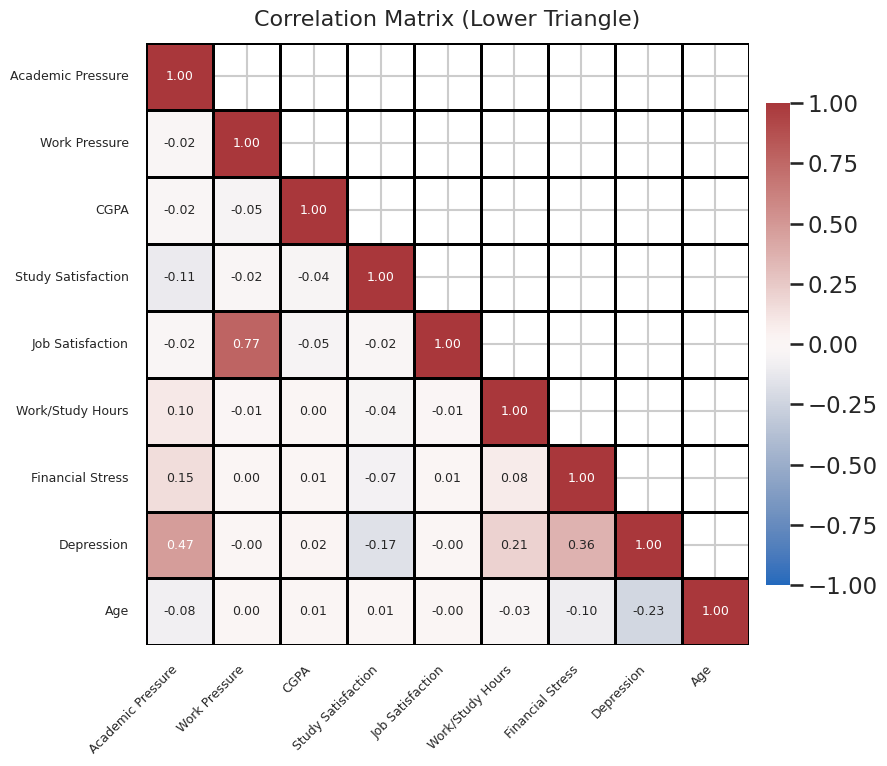

In [54]:
numerical_features = list(dict.fromkeys(numerical_features + ['Depression']))

# Move 'Age' to the end so its row appears in the lower triangle
if 'Age' in numerical_features:
    numerical_features = [f for f in numerical_features if f != 'Age'] + ['Age']

# ---------- 2.  correlation matrix -----------------
df_numeric = df[numerical_features].copy()
corr       = df_numeric.corr().round(2)

# mask out the strict upper triangle (diag stays visible)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# ---------- 3.  plot -----------------
fig_w = max(10, len(numerical_features)*0.6)
fig_h = max(8,  len(numerical_features)*0.5)

plt.figure(figsize=(fig_w, fig_h))
sns.heatmap(
    corr,
    mask       = mask,
    cmap       = 'vlag',          # diverging, centred on 0
    vmin       = -1, vmax = 1,
    center     = 0,
    annot      = True, fmt = ".2f",
    annot_kws  = {"size": 9},
    linewidths = .8, linecolor='black',
    square     = True,
    cbar_kws   = {"shrink": 0.8, "pad": 0.02}
)

plt.title('Correlation Matrix (Lower Triangle)', fontsize=16, pad=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0,              fontsize=9)
plt.tight_layout()
plt.show()

In [45]:
df['Financial Stress'].value_counts()

,count
Financial Stress,
5.0,6715
4.0,5775
3.0,5226
1.0,5121
2.0,5061


<ipython-input-55-5e262b2e2aa3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=dependent_col, y=col, data=data,
<ipython-input-55-5e262b2e2aa3>:14: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x=dependent_col, y=col, data=data,
<ipython-input-55-5e262b2e2aa3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=dependent_col, y=col, data=data,
<ipython-input-55-5e262b2e2aa3>:14: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`

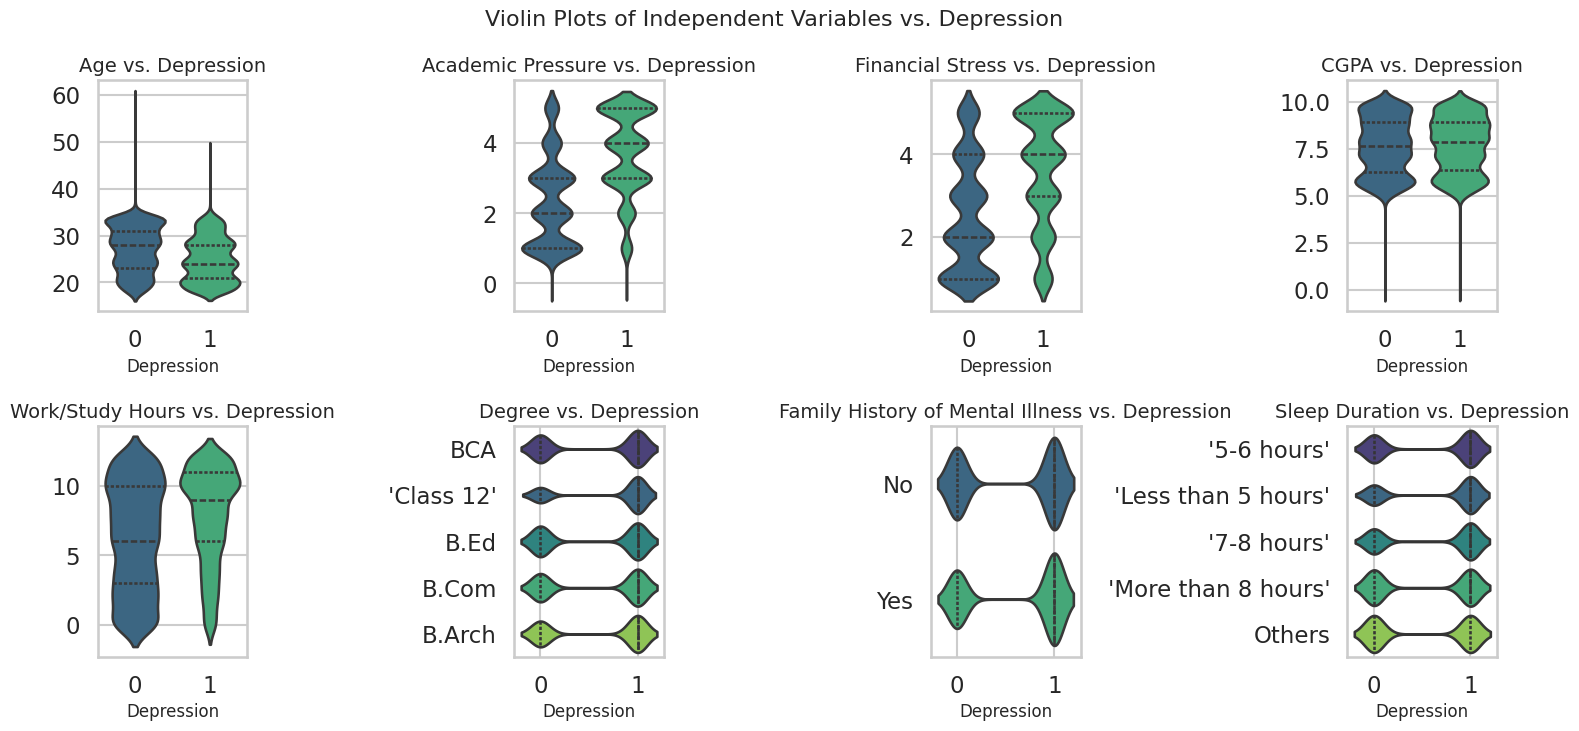

In [55]:
dependent_col = 'Depression'
independent_cols = ['Age', 'Academic Pressure', 'Financial Stress', 'CGPA', 'Work/Study Hours', 'Degree', 'Family History of Mental Illness', 'Sleep Duration']
top_cities = df['City'].value_counts().head(5).index
top_degree = df['Degree'].value_counts().head(5).index

plt.figure(figsize=(15, 10))
for i, col in enumerate(independent_cols, 1):
    plt.subplot(3, 4, i)

    if col == 'Degree':
        data = df[df['Degree'].isin(top_degree)]
    else:
        data = df
    sns.violinplot(x=dependent_col, y=col, data=data,
                   palette="viridis",
                   inner="quartile",
                   bw=.2)

    plt.title(f'{col} vs. Depression', fontsize=14)
    plt.xlabel(dependent_col, fontsize=12)
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Violin Plots of Independent Variables vs. Depression", fontsize=16, y=1.02)
plt.show()